## 📦 Import bibliotek i wczytanie danych

W tej części importujemy niezbędne biblioteki do analizy danych oraz wczytujemy plik `houses.csv`.  
Funkcja `info()` pozwala sprawdzić typy kolumn oraz zidentyfikować brakujące dane.

In [65]:
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from xgboost import XGBRegressor


houses = pd.read_csv('houses.csv')

In [27]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Jakosc                   1460 non-null   int64  
 1   Powierzchnia             1460 non-null   int64  
 2   PowierzchniaPiwnicy      1460 non-null   int64  
 3   LiczbaMscGaraz           1460 non-null   int64  
 4   PowierzchniaGarazu       1460 non-null   int64  
 5   RokBudowy                1460 non-null   int64  
 6   LiczbaLazienek           1460 non-null   int64  
 7   Powierzchnia1Pietra      1460 non-null   int64  
 8   LiczbaPokoi              1460 non-null   int64  
 9   TypGarazu                1379 non-null   object 
 10  DlugoscDzialkiPrzyUlicy  1201 non-null   float64
 11  Sasiedztwo               1460 non-null   object 
 12  Cena                     1460 non-null   int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 148.4+ KB


In [28]:
houses.describe()

,Jakosc,Powierzchnia,PowierzchniaPiwnicy,LiczbaMscGaraz,PowierzchniaGarazu,RokBudowy,LiczbaLazienek,Powierzchnia1Pietra,LiczbaPokoi,DlugoscDzialkiPrzyUlicy,Cena
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000
mean,6.099315,1515.463699,1057.429452,1.767123,472.980137,1971.267808,1.565068,1162.626712,6.517808,70.049958,180921.195890
std,1.382997,525.480383,438.705324,0.747315,213.804841,30.202904,0.550916,386.587738,1.625393,24.284752,79442.502883
min,1.000000,334.000000,0.000000,0.000000,0.000000,1872.000000,0.000000,334.000000,2.000000,21.000000,34900.000000
25%,5.000000,1129.500000,795.750000,1.000000,334.500000,1954.000000,1.000000,882.000000,5.000000,59.000000,129975.000000
50%,6.000000,1464.000000,991.500000,2.000000,480.000000,1973.000000,2.000000,1087.000000,6.000000,69.000000,163000.000000
75%,7.000000,1776.750000,1298.250000,2.000000,576.000000,2000.000000,2.000000,1391.250000,7.000000,80.000000,214000.000000
max,10.000000,5642.000000,6110.000000,4.000000,1418.000000,2010.000000,3.000000,4692.000000,14.000000,313.000000,755000.000000


---

### 🧼 Imputowanie brakujących danych

Dane zostały oczyszczone z braków poprzez uzupełnienie ich:

- **dla danych numerycznych** — za pomocą mediany (odporna na wartości odstające),
- **dla danych kategorycznych** — za pomocą najczęściej występującej wartości (moda).

Zmieniliśmy dane bezpośrednio w oryginalnej ramce `houses`.

In [67]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

num_features = houses.select_dtypes(include=['int64', 'float64']).columns.to_list()
cat_features = houses.select_dtypes(include=['object']).columns.to_list()

houses[num_features] = num_imputer.fit_transform(houses[num_features])
houses[cat_features] = cat_imputer.fit_transform(houses[cat_features])
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Jakosc                   1460 non-null   float64
 1   Powierzchnia             1460 non-null   float64
 2   PowierzchniaPiwnicy      1460 non-null   float64
 3   LiczbaMscGaraz           1460 non-null   float64
 4   PowierzchniaGarazu       1460 non-null   float64
 5   RokBudowy                1460 non-null   float64
 6   LiczbaLazienek           1460 non-null   float64
 7   Powierzchnia1Pietra      1460 non-null   float64
 8   LiczbaPokoi              1460 non-null   float64
 9   TypGarazu                1460 non-null   object 
 10  DlugoscDzialkiPrzyUlicy  1460 non-null   float64
 11  Sasiedztwo               1460 non-null   object 
 12  Cena                     1460 non-null   float64
dtypes: float64(11), object(2)
memory usage: 148.4+ KB


In [68]:
houses.isnull().sum()

Jakosc                     0
Powierzchnia               0
PowierzchniaPiwnicy        0
LiczbaMscGaraz             0
PowierzchniaGarazu         0
RokBudowy                  0
LiczbaLazienek             0
Powierzchnia1Pietra        0
LiczbaPokoi                0
TypGarazu                  0
DlugoscDzialkiPrzyUlicy    0
Sasiedztwo                 0
Cena                       0
dtype: int64

---

## 📈 Macierz korelacji

Macierz korelacji przedstawia siłę i kierunek zależności pomiędzy wszystkimi zmiennymi numerycznymi.  
Może pomóc w identyfikacji silnie skorelowanych zmiennych, co jest istotne np. przy budowie modelu predykcyjnego.


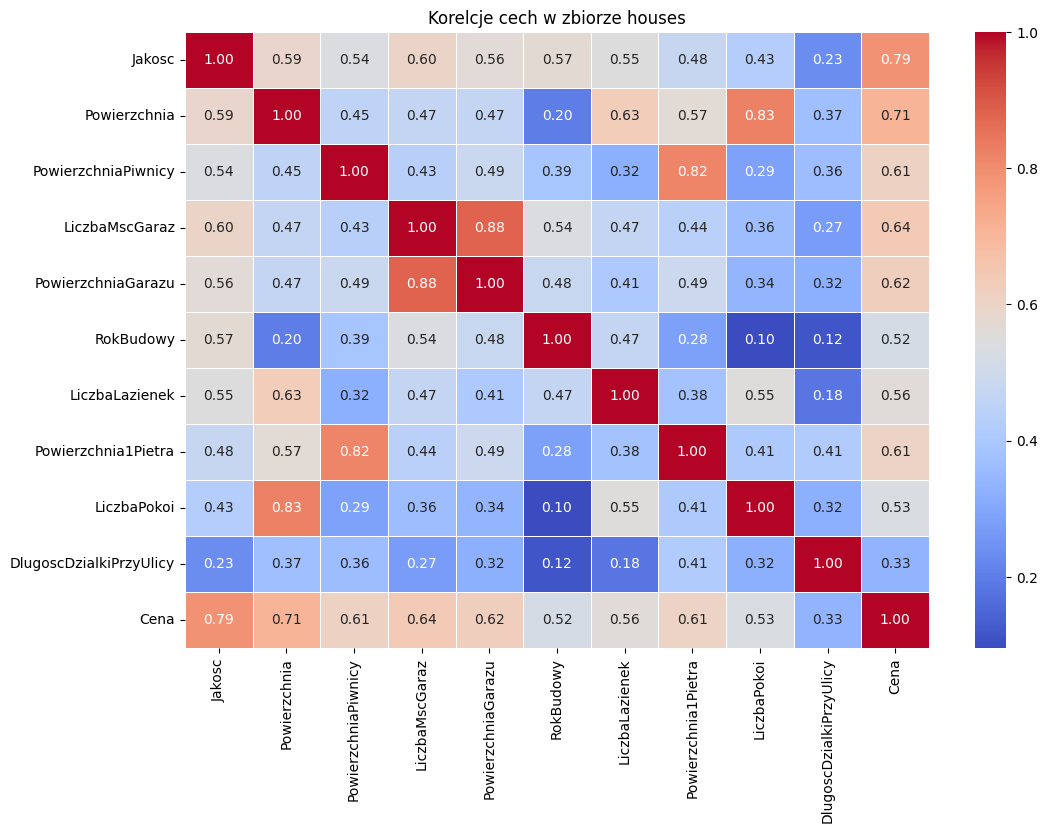

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(houses[num_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Korelcje cech w zbiorze houses')
plt.savefig('houses_correlation.png')
plt.show()


---

### 📊 Boxplot – rozkład cen

Boxplot pokazuje rozkład cen domów oraz pozwala łatwo zidentyfikować obserwacje odstające (outliery),  
które pojawiają się jako punkty poza zasięgiem „wąsów” wykresu.


/var/folders/tt/btlv0gfs7sb7jp967ssxpc500000gn/T/ipykernel_1684/808450321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=houses["Cena"],palette="pastel")


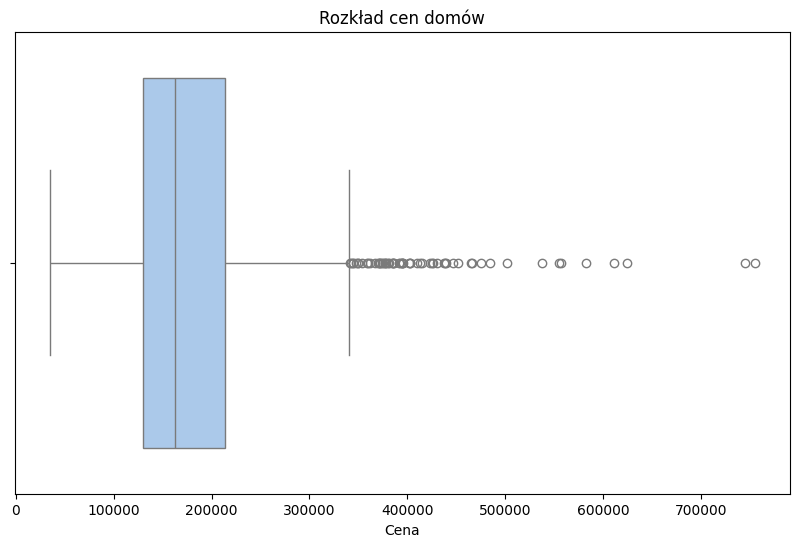

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x=houses["Cena"],palette="pastel")
plt.title('Rozkład cen domów')
plt.savefig('Houses_boxplot.png')
plt.show()

---

### 📊 Histogram cen

Histogram przedstawia szczegółowy rozkład zmiennej `Cena`.  
Dodatkowo, krzywa KDE (Kernel Density Estimate) pokazuje przybliżony kształt rozkładu tej zmiennej.  
Widzimy, że dane są prawoskośne (asymetryczne).

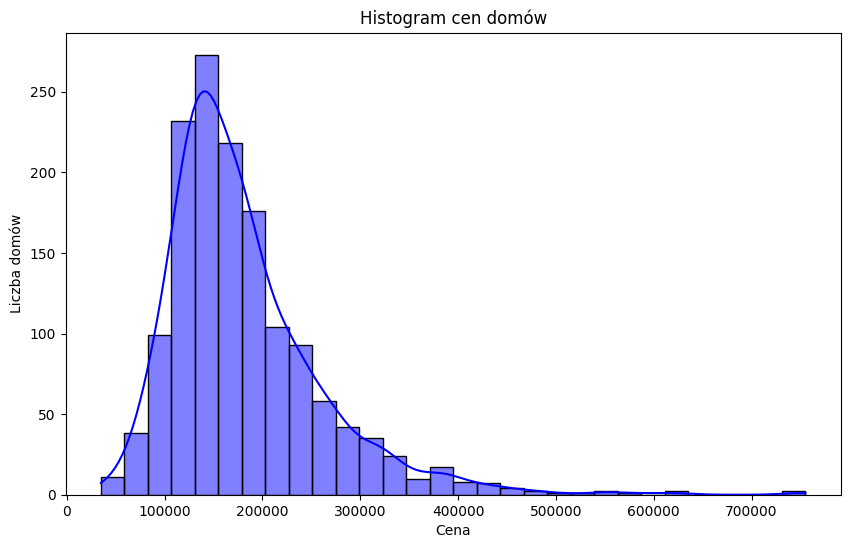

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(houses["Cena"], bins=30, kde=True, color='blue')
plt.title('Histogram cen domów')
plt.xlabel('Cena')
plt.ylabel('Liczba domów')
plt.savefig('Houses_histogram.png')
plt.show()


---

## 🔢 Logarytmowanie zmiennej `Cena`

W tej części zastosowano transformację logarytmiczną do zmiennej `Cena` wyłącznie w celu poprawy wizualizacji rozkładu.  
Logarytmowanie może pomóc w normalizacji danych o silnej asymetrii.  
Po stworzeniu wykresu, tymczasowa kolumna została usunięta.

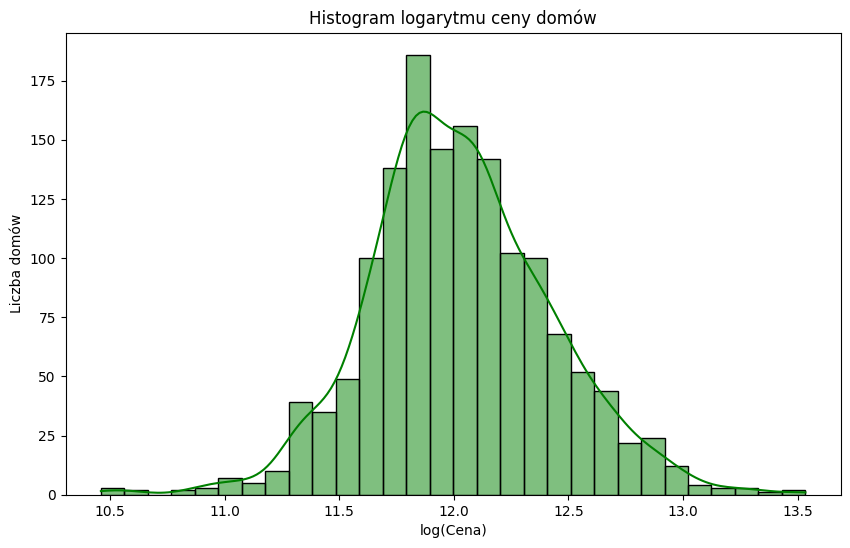

In [41]:
# Logarytmowanie ceny (tworzymy nową kolumnę tylko do wykresu)
houses['Cena_log'] = np.log(houses['Cena'])

# Histogram zlogarytmowanej ceny
plt.figure(figsize=(10,6))
sns.histplot(houses["Cena_log"], bins=30, kde=True, color='green')
plt.title('Histogram logarytmu ceny domów')
plt.xlabel('log(Cena)')
plt.ylabel('Liczba domów')
plt.savefig('Houses_histogram_log.png')  # Zapisz wykres
plt.show()

# Usuwamy tymczasową kolumnę
houses.drop(columns='Cena_log', inplace=True)

### 🔍 Dlaczego stosujemy logarytmowanie zmiennej `Cena`?

Transformacja logarytmiczna (np. `np.log(Cena)`) to popularna technika przekształcania danych, szczególnie gdy rozkład zmiennej jest mocno skośny. W przypadku cen domów, które często mają kilka bardzo wysokich wartości (outliery), logarytmowanie przynosi kilka korzyści:

---

#### ✅ 1. Normalizacja rozkładu

Ceny domów zwykle mają **rozrzutny, prawoskośny rozkład** – wiele wartości niskich i kilka bardzo wysokich. Logarytmowanie „spłaszcza” wysokie wartości i przybliża dane do rozkładu normalnego.



#### ✅ 2. Lepsze dopasowanie modeli

Wiele modeli statystycznych (np. regresja liniowa) zakłada, że dane lub błędy mają rozkład normalny. Logarytmowanie może poprawić jakość dopasowania modelu.


#### ✅ 3. Zmniejszenie wpływu obserwacji odstających (outliers)

Duże wartości przestają dominować analizę. Dzięki temu wykresy są bardziej czytelne, a modele bardziej odporne.



#### ✅ 4. Interpretacja procentowa

W modelach z użyciem logarytmów można interpretować zmiany jako procentowe.  
Np. zmiana o 1 w log(Cena) oznacza około 100% wzrost ceny.



#### 🧠 Przykład

Zamiast:

Cena:  100,000   200,000   1,000,000

log(Cena): 11.5     12.2      13.8


--- 

### 🧹 Usuwanie obserwacji odstających (outlierów)

Aby oczyścić dane z obserwacji odstających w zmiennej `Cena`, zastosowaliśmy metodę IQR (interquartile range – rozstęp międzykwartylowy):

1. **Wyznaczenie kwartylów:**
   - Q1 – pierwszy kwartyl (25. percentyl)
   - Q3 – trzeci kwartyl (75. percentyl)

2. **Obliczenie rozstępu międzykwartylowego (IQR):**
   \[
   \text{IQR} = Q3 - Q1
   \]

3. **Wyznaczenie dopuszczalnego zakresu wartości:**
   - Dolna granica: `Q1 - 1.5 * IQR`
   - Górna granica: `Q3 + 1.5 * IQR`

4. **Filtrowanie danych:**
   Zbiór `houses` został ograniczony tylko do obserwacji, których `Cena` mieści się w wyznaczonym zakresie. Usunięto w ten sposób wartości nietypowo niskie lub wysokie, które mogłyby zakłócać analizę statystyczną lub modelowanie.

---

> ℹ️ Warto pamiętać, że metoda IQR jest jedną z najczęściej stosowanych technik detekcji outlierów w analizie eksploracyjnej danych – jest prosta, odporna na rozkład danych i nie wymaga założeń o normalności.


In [69]:
houses.shape[0]

1460

In [70]:
Q1 = houses['Cena'].quantile(0.25)
Q3 = houses['Cena'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = houses[(houses['Cena'] <= lower_bound) | (houses['Cena'] >= upper_bound)]
houses = houses[(houses['Cena'] >= lower_bound) & (houses['Cena'] <= upper_bound)]


In [71]:
houses.shape[0]

1399

### 📉 Porównanie rozkładu `Cena` przed i po usunięciu outlierów

Wykorzystując metodę IQR, usunięto obserwacje odstające ze zmiennej `Cena`.  
Celem było wyeliminowanie wartości ekstremalnych, które mogłyby zaburzać analizę danych.

---

#### 🔲 Boxplot po usunięciu outlierów

Wykres pudełkowy (boxplot) po oczyszczeniu danych pokazuje bardziej zwarty i reprezentatywny rozkład cen.  
Zniknęły punkty skrajne, a rozpiętość danych jest mniejsza.

---

#### 📊 Histogram po usunięciu outlierów

Histogram cen domów po usunięciu outlierów pokazuje główny rozkład danych bez zaburzeń wynikających z ekstremalnie wysokich lub niskich cen.  
Dzięki temu łatwiej zidentyfikować typowe wartości oraz symetrię rozkładu.

---

> 🔍 Porównanie wykresów przed i po oczyszczeniu danych pozwala ocenić, w jakim stopniu obserwacje odstające wpływały na interpretację rozkładu zmiennej `Cena`.


/var/folders/tt/btlv0gfs7sb7jp967ssxpc500000gn/T/ipykernel_1684/1745705700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=houses["Cena"],palette="pastel")


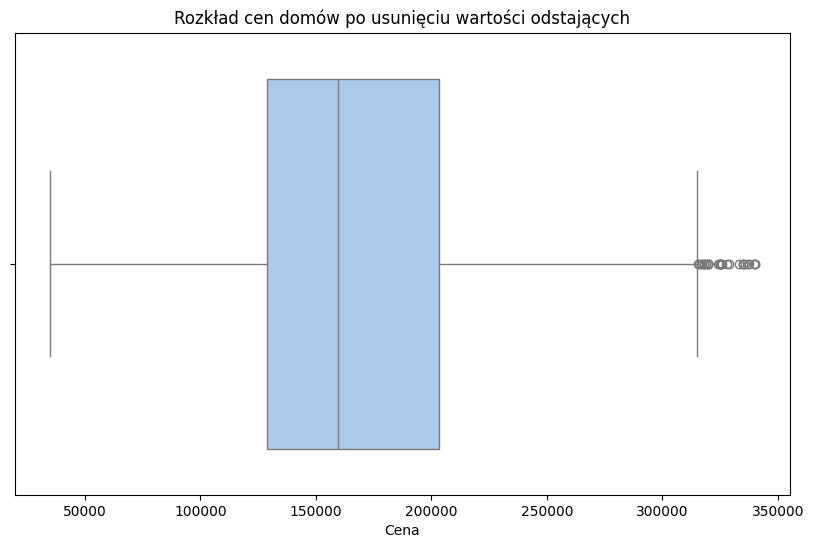

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x=houses["Cena"],palette="pastel")
plt.title('Rozkład cen domów po usunięciu wartości odstających')
plt.savefig('Houses_boxplot_no_outliers.png')
plt.show()

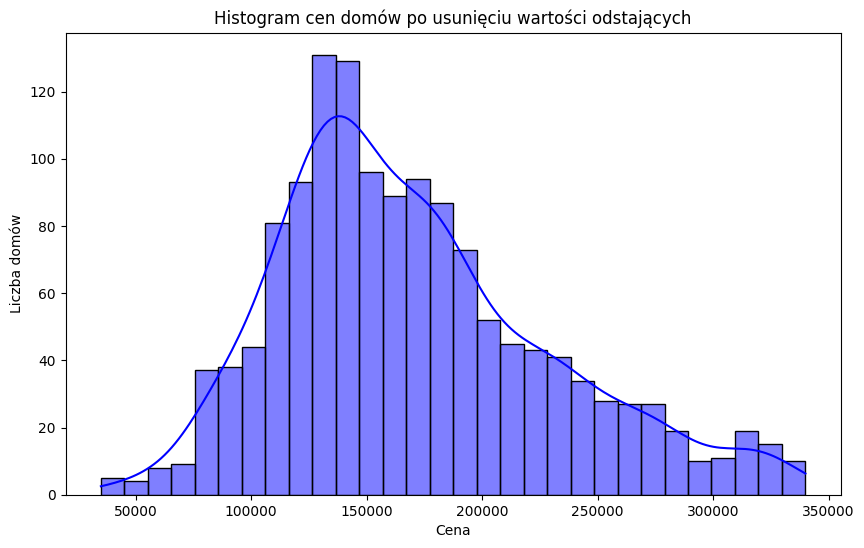

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(houses["Cena"], bins=30, kde=True, color='blue')
plt.title('Histogram cen domów po usunięciu wartości odstających')
plt.xlabel('Cena')
plt.ylabel('Liczba domów')
plt.savefig('Houses_histogram_no_outliers.png')
plt.show()


### 📊 Porównanie wykresów: Przed i po usunięciu outlierów

<div style="display: flex; justify-content: space-between; gap: 20px;">

<img src="Houses_boxplot.png" alt="Boxplot przed" width="45%">
<img src="Houses_boxplot_no_outliers.png" alt="Boxplot po" width="45%">

</div>

---

<div style="display: flex; justify-content: space-between; gap: 20px;">

<img src="Houses_histogram.png" alt="Histogram przed" width="45%">
<img src="Houses_histogram_no_outliers.png" alt="Histogram po" width="45%">

</div>


## 🧩 One-Hot Encoding zmiennych kategorycznych

Aby przygotować dane kategoryczne do analizy i modelowania, zastosowano technikę **one-hot encodingu**.  
Zmienna kategoryczna zostaje przekształcona w zestaw zmiennych binarnych (0/1), które wskazują obecność konkretnej kategorii.

---

#### 📌 Szczegóły zastosowanej transformacji:

- Użyto klasy `OneHotEncoder` z biblioteki `scikit-learn`.
- Parametr `sparse_output=False` sprawia, że wynik jest zwykłym DataFrame'em, a nie macierzą rzadką.
- `handle_unknown='ignore'` pozwala bezpiecznie kodować dane testowe, które mogą zawierać nowe, nieznane kategorie.
- Zakodowane kolumny otrzymują automatycznie wygenerowane nazwy w formacie `nazwa_kolumny_nazwa_kategorii`.

---

#### 🧠 Przykład:
Zmienna `Kolor` z trzema kategoriami (`czerwony`, `zielony`, `niebieski`) zostaje zakodowana jako:

| Kolor_czerwony | Kolor_zielony | Kolor_niebieski |
|----------------|----------------|------------------|
| 1              | 0              | 0                |
| 0              | 1              | 0                |
| 0              | 0              | 1                |

---

> Ostatecznie usunięto oryginalne kolumny kategoryczne i połączono zakodowane kolumny z ramką danych `houses`.


In [72]:
from sklearn.preprocessing import OneHotEncoder 

# One-hot encoding dla cech kategorycznych
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = pd.DataFrame(encoder.fit_transform(houses[cat_features]))
encoded.index = houses.index 

encoded.columns = encoder.get_feature_names_out(cat_features)

houses = houses.drop(cat_features, axis=1).join(encoded)

In [73]:
houses.iloc[0]

Jakosc                          7.0
Powierzchnia                 1710.0
PowierzchniaPiwnicy           856.0
LiczbaMscGaraz                  2.0
PowierzchniaGarazu            548.0
RokBudowy                    2003.0
LiczbaLazienek                  2.0
Powierzchnia1Pietra           856.0
LiczbaPokoi                     8.0
DlugoscDzialkiPrzyUlicy        65.0
Cena                       208500.0
TypGarazu_2Types                0.0
TypGarazu_Attchd                1.0
TypGarazu_Basment               0.0
TypGarazu_BuiltIn               0.0
TypGarazu_CarPort               0.0
TypGarazu_Detchd                0.0
Sasiedztwo_Blmngtn              0.0
Sasiedztwo_Blueste              0.0
Sasiedztwo_BrDale               0.0
Sasiedztwo_BrkSide              0.0
Sasiedztwo_ClearCr              0.0
Sasiedztwo_CollgCr              1.0
Sasiedztwo_Crawfor              0.0
Sasiedztwo_Edwards              0.0
Sasiedztwo_Gilbert              0.0
Sasiedztwo_IDOTRR               0.0
Sasiedztwo_MeadowV          

## 🧪 Podział danych na zbiór treningowy i testowy

Dane zostały podzielone na:

- `X` – dane wejściowe (cechy), jest to macierz 
- `y` – zmienną docelową (`Cena`), którą chcemy przewidywać; jest to wektor

Użyto funkcji `train_test_split` z biblioteki `scikit-learn`, aby uzyskać:

- `X_train`, `y_train` – dane treningowe (80%)
- `X_test`, `y_test` – dane testowe (20%)

Parametr `random_state=42` zapewnia powtarzalność wyników przy kolejnych uruchomieniach.

Sprawdzenie `.shape` pozwala upewnić się, że dane zostały poprawnie podzielone.


In [75]:
from sklearn.model_selection import train_test_split

X = houses.drop(columns=["Cena"])
y = houses["Cena"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1119, 41), (280, 41), (1119,), (280,))

## 📏 Standaryzacja zmiennych numerycznych (StandardScaler)

W celu ujednolicenia skali zmiennych numerycznych zastosowano transformację `StandardScaler` z biblioteki `scikit-learn`.  
Transformacja ta przekształca dane tak, aby:

- średnia (`mean`) każdej cechy = **0**
- odchylenie standardowe (`std`) = **1**

---

#### ✅ Kiedy i dlaczego stosujemy standaryzację?

Standaryzacja jest szczególnie **ważna w przypadku modeli, które są wrażliwe na skalę danych**, np.:

- **Regresja liniowa** (`LinearRegression`)
- **Regresja logistyczna** (`LogisticRegression`)
- **k-Nearest Neighbors** (`KNeighborsClassifier`, `KNeighborsRegressor`)
- **Support Vector Machines** (`SVC`, `SVR`)
- **Principal Component Analysis** (PCA)
- **Gradient descent-based modele** (np. sieci neuronowe)

Modele te zakładają, że cechy są porównywalne pod względem skali — bez standaryzacji cechy o dużej wartości liczbowej mogą dominować.

---

#### ⚠️ Dlaczego skalujemy **dopiero po podziale na zbiory treningowy i testowy**?

- Standaryzację wykonujemy **tylko na zbiorze treningowym** (`fit_transform`) — obliczamy średnią i std.
- Zbiór testowy przekształcamy **tylko za pomocą `.transform()`** — czyli przy użyciu tych samych parametrów co dla treningu.
  
> ✅ Dzięki temu unikamy **wycieku informacji z danych testowych**, co mogłoby prowadzić do błędnego zawyżenia wyników modelu.

---

> ℹ️ Zmienna docelowa `Cena` została wcześniej usunięta z listy `num_features`, ponieważ nie powinna być skalowana jako cecha wejściowa.


In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features.remove("Cena")

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])
X_train.head()

,Jakosc,Powierzchnia,PowierzchniaPiwnicy,LiczbaMscGaraz,PowierzchniaGarazu,RokBudowy,LiczbaLazienek,Powierzchnia1Pietra,LiczbaPokoi,DlugoscDzialkiPrzyUlicy,...,Sasiedztwo_NoRidge,Sasiedztwo_NridgHt,Sasiedztwo_OldTown,Sasiedztwo_SWISU,Sasiedztwo_Sawyer,Sasiedztwo_SawyerW,Sasiedztwo_Somerst,Sasiedztwo_StoneBr,Sasiedztwo_Timber,Sasiedztwo_Veenker
1172,0.773567,-0.470114,-0.979141,0.372607,0.786389,1.169947,0.842479,-1.412104,-0.919812,-1.562505,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49,-0.781908,-1.070424,-0.180182,-1.003456,-0.369937,-0.134268,-1.024321,-0.494713,-0.271249,-0.156968,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
160,-0.004170,-0.506743,0.490460,0.372607,0.259027,0.452629,0.842479,0.275339,-0.271249,-0.020948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
319,0.773567,-0.018356,0.829412,0.372607,0.607376,0.322207,0.842479,0.942533,-0.271249,-0.020948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1343,-0.004170,0.879055,-0.323026,0.372607,-0.582817,-1.373271,-1.024321,0.108541,1.674441,-0.565027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 🤖 Regresja liniowa, Ridge, Lasso

W tej sekcji utworzono i przetestowano trzy modele regresyjne:

- `Linear Regression` – klasyczna regresja liniowa,
- `Ridge Regression` – regresja grzbietowa z regularyzacją L2 (parametr `alpha=1.0`),
- `Lasso Regression` – regresja Lasso z regularyzacją L1 (parametr `alpha=1.0`).

Linear → „wszyscy do tablicy!”

Ridge → „wszyscy zostają, ale mówcie ciszej”

Lasso → „ty, ty i ty – wypad! 🚪”

---

#### 📋 Etapy przetwarzania:

Dla każdego modelu wykonano następujące kroki:

1. **Trenowanie modelu** na zbiorze `X_train`, `y_train`.
2. **Predykcja** na zbiorze testowym (`X_test`).
3. **Zapis wyników predykcji** do słownika `predictions`.
4. **Obliczenie metryk błędu** i zapis do słownika `metrics`:
   - MAE – średni błąd bezwzględny (mean absolute error),
   - RMSE – pierwiastek z błędu średniokwadratowego (root mean squared error),
   - R² – współczynnik determinacji.
5. **Zapis współczynników regresji** (`coef_`) do słownika `coefficients`.



> 🧠 RMSE został obliczony klasycznie jako pierwiastek z MSE (`np.sqrt(mean_squared_error(...))`), aby zapewnić kompatybilność z wersją biblioteki `scikit-learn`.


Dzięki temu możliwe jest łatwe porównanie modeli pod względem dokładności predykcji oraz interpretacja współczynników każdego z nich.
"

In [78]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# Lista modeli do przetestowania
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0),
}

# Słowniki do przechowywania wyników
metrics = {"Model": [], "MAE": [], "RMSE": [], "R² Score": []}
predictions = {name: None for name in models}
coefficients = {name: None for name in models}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    
    metrics["Model"].append(name)
    metrics["MAE"].append(mean_absolute_error(y_test, y_pred))
    metrics["RMSE"].append(np.sqrt(mean_squared_error(y_test, y_pred)))
    metrics["R² Score"].append(r2_score(y_test, y_pred))

    if hasattr(model, 'coef_'):
        coefficients[name] = model.coef_


/opt/anaconda3/envs/houses/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.067e+09, tolerance: 4.007e+08
  model = cd_fast.enet_coordinate_descent(


### 🧮 Regularyzacja L1 vs L2 – porównanie

Regularyzacja to technika, która zapobiega **przeuczeniu modelu (overfittingowi)** poprzez **ograniczenie wartości współczynników regresji**.  
Dodaje się ją do funkcji błędu (np. MSE), aby "ukarać" zbyt duże współczynniki.

---

#### 📊 Porównanie L1 (Lasso) i L2 (Ridge)

| Cecha                | L1 (Lasso Regression)                                  | L2 (Ridge Regression)                                 |
|----------------------|--------------------------------------------------------|--------------------------------------------------------|
| Typ kary             | Suma wartości bezwzględnych współczynników: \(\sum |w_i|\) | Suma kwadratów współczynników: \(\sum w_i^2\)         |
| Efekt                | Może **wyzerować niektóre współczynniki**              | **Zmniejsza wszystkie współczynniki**, ale ich nie zeruje |
| Wpływ na model       | Prowadzi do **rzadszego modelu** (feature selection)    | Prowadzi do **stabilniejszego modelu**                 |
| Kiedy stosować?      | Gdy chcesz wybrać najważniejsze cechy (feature selection) | Gdy masz wiele skorelowanych cech i chcesz ustabilizować model |
| Inna cecha           | Może prowadzić do modeli z mniejszą liczbą zmiennych   | Używa wszystkich cech, ale z mniejszą wagą             |

---

### 🧠 Intuicyjny przykład

Wyobraź sobie, że masz dane z **100 zmiennymi (cechami):**

- **Lasso**: „Tak naprawdę tylko 5 z nich coś znaczą. Wyzeruję resztę.”  
  → Twój model wykorzystuje tylko te najbardziej informacyjne cechy.

- **Ridge**: „Wszystkie cechy coś wnoszą, ale nie pozwolę, żeby któraś zdominowała model.”  
  → Wszystkie współczynniki zostają, ale są **przytłumione**, żeby model był stabilniejszy.

---

> 📌 W praktyce często stosuje się też **Elastic Net**, które łączy zalety L1 i L2.


### ⚙️ Czym jest `alpha` w modelach Ridge i Lasso?

`alpha` to hiperparametr regularyzacji, który kontroluje **siłę kary za duże współczynniki regresji**.  
Jest to sposób na kontrolowanie złożoności modelu i unikanie przefitowania (overfittingu).

---

#### 📏 Jak działa `alpha`?

- `alpha = 0` → brak regularyzacji (zwykła regresja liniowa)
- `alpha > 0` → model ogranicza rozmiar współczynników:
  - W Ridge: zmniejsza współczynniki (ale ich nie zeruje)
  - W Lasso: może je całkowicie wyzerować (czyli usuwa cechy)

---

#### 📊 Intuicyjne porównanie:

Wyobraź sobie, że budujesz przepis (model) z wielu składników (cech):

- Przy małym `alpha`: możesz dodać dowolnie dużo każdego składnika
- Przy dużym `alpha`: ograniczasz użycie, a przy Lasso możesz nawet **wyrzucić** niektóre całkowicie

---

#### 🔧 Dobór `alpha`:

W praktyce warto testować różne wartości `alpha`, np. 0.01, 0.1, 1.0, 10.0...  
Można też używać automatycznego dopasowania (`LassoCV`, `RidgeCV`), które znajdą najlepszą wartość `alpha`.

> 📌 `alpha` to jeden z najważniejszych parametrów regulujących złożoność i generalizację modelu regresji.


### 📈 Porównanie współczynników regresji

Poniższy wykres przedstawia wartości współczynników (`coef_`) przypisanych przez trzy różne modele:

- **Linear Regression** – model bez regularyzacji,
- **Ridge Regression** – model z regularyzacją L2,
- **Lasso Regression** – model z regularyzacją L1.

---

#### 🔍 Interpretacja:

- Wartości współczynników pokazują, jak silnie dana cecha wpływa na przewidywaną cenę.
- **Lasso** może całkowicie wyzerować nieistotne cechy – działa jak narzędzie do selekcji zmiennych.
- **Ridge** ogranicza duże wartości współczynników, ale nie wyzerowuje ich – zapobiega przefitowaniu.
- **Linear Regression** może przypisywać bardzo duże wartości – jeśli dane są skorelowane, może być niestabilny.

---

> Wykres ten pomaga zrozumieć, które cechy model uważa za istotne oraz jak regularyzacja wpływa na strukturę modelu.


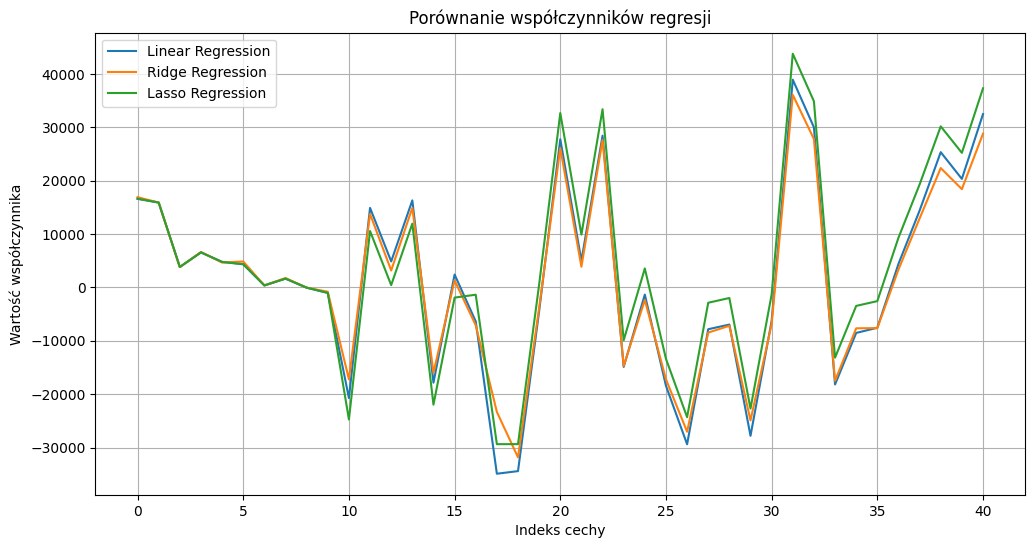

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for name, coefs in coefficients.items():
    plt.plot(coefs, label=name)

plt.title('Porównanie współczynników regresji')
plt.xlabel('Indeks cechy')
plt.ylabel('Wartość współczynnika')
plt.legend()
plt.grid(True)
plt.show()


### 📊 Wykres: Rzeczywiste vs. Przewidywane ceny

Poniższy wykres przedstawia zależność pomiędzy rzeczywistymi cenami domów (`y_test`) a przewidywanymi wartościami (`y_pred`) wygenerowanymi przez model regresji liniowej.

- Oś X: rzeczywiste ceny
- Oś Y: przewidywane przez model ceny
- Czerwona linia `y = x` pokazuje idealne dopasowanie – każda kropka na tej linii oznacza idealną predykcję.

---

#### 🔍 Jak interpretować:

- Punkty **blisko czerwonej linii** → dobre dopasowanie modelu
- Punkty **powyżej linii** → model zaniżył wartość (przewidział za mało)
- Punkty **poniżej linii** → model zawyżył wartość (przewidział za dużo)
- Im większy rozrzut, tym większy błąd predykcji

> Ten wykres pozwala ocenić nie tylko jakość modelu, ale też zakres, w którym model sobie radzi lepiej lub gorzej.


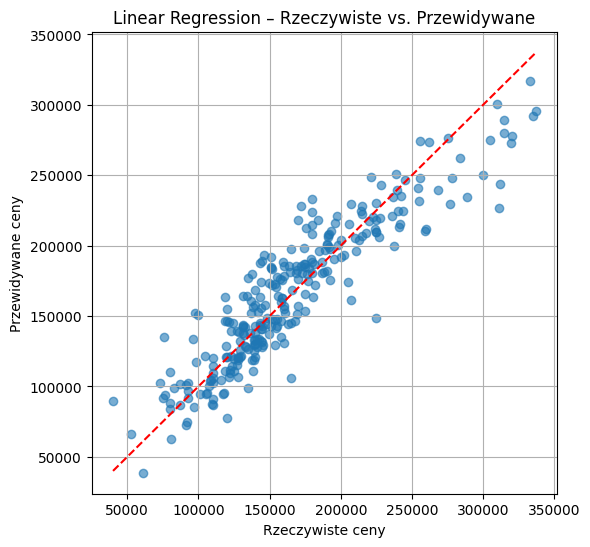

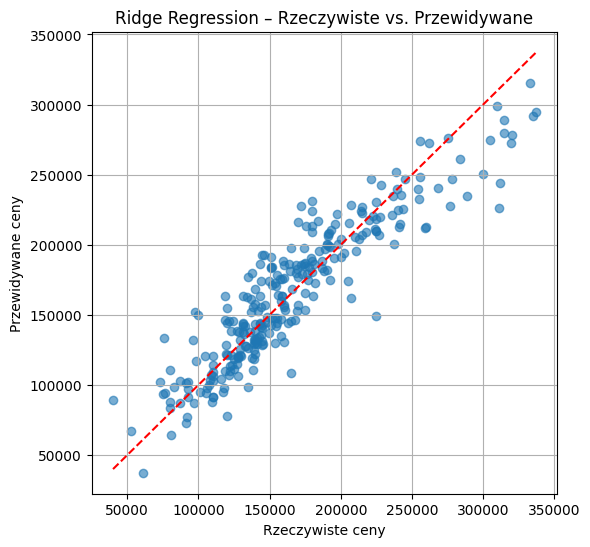

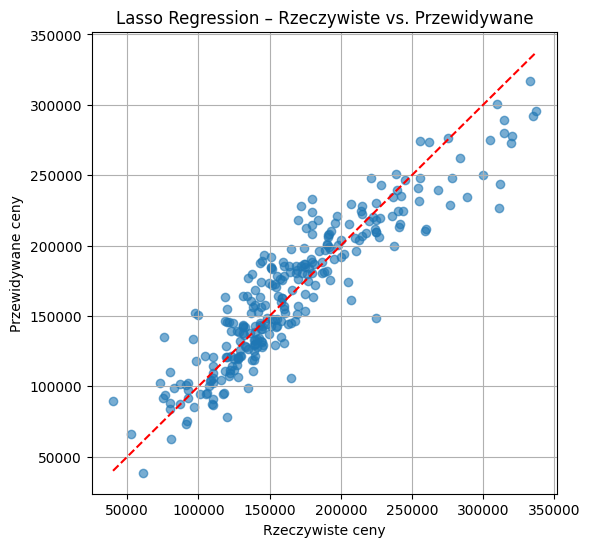

In [80]:
for name in predictions:
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, predictions[name], alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Rzeczywiste ceny')
    plt.ylabel('Przewidywane ceny')
    plt.title(f'{name} – Rzeczywiste vs. Przewidywane')
    plt.grid(True)
    plt.show()


### 🚀 Dodanie modelu XGBoost do porównania

Do listy testowanych modeli dodano również **XGBoost** – bardzo wydajny model bazujący na boostingowych drzewach decyzyjnych.

---

#### 📦 Parametry XGBoost:

- `objective='reg:squarederror'` – cel regresyjny (MSE)
- `n_estimators=100` – liczba drzew
- `learning_rate=0.1` – tempo uczenia (boosting rate)
- `max_depth=6` – maksymalna głębokość drzewa
- `subsample=0.8` – losowa podpróbka danych (zmniejsza overfitting)
- `random_state=42` – powtarzalność wyników

---

#### 📊 W pętli dla każdego modelu:

- wytrenowano model na danych `X_train`, `y_train`
- wygenerowano predykcje na `X_test`
- obliczono metryki:
  - MAE – średni błąd bezwzględny
  - RMSE – pierwiastek błędu średniokwadratowego
  - R² – współczynnik determinacji
- zapisano współczynniki (`coef_`) jeśli model je udostępnia

---

> ℹ️ Model XGBoost nie ma atrybutu `coef_` jak modele liniowe – jego siła tkwi w strukturze drzew, a nie we współczynnikach. Dlatego `coefficients["XGBoost"]` pozostaje `None`.


In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# Lista modeli do przetestowania
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, subsample=0.8)
}

# Słowniki do przechowywania wyników
metrics = {"Model": [], "MAE": [], "RMSE": [], "R² Score": []}
predictions = {name: None for name in models}
coefficients = {name: None for name in models}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    
    metrics["Model"].append(name)
    metrics["MAE"].append(mean_absolute_error(y_test, y_pred))
    metrics["RMSE"].append(np.sqrt(mean_squared_error(y_test, y_pred)))
    metrics["R² Score"].append(r2_score(y_test, y_pred))

    if hasattr(model, 'coef_'):
        coefficients[name] = model.coef_

/opt/anaconda3/envs/houses/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.067e+09, tolerance: 4.007e+08
  model = cd_fast.enet_coordinate_descent(


## 📊 Porównanie jakości modeli – metryki regresji

W tabeli poniżej przedstawiono trzy podstawowe metryki służące do oceny jakości predykcji regresyjnych:

| Metryka | Opis |
|--------|------|
| **MAE (Mean Absolute Error)** | Średni błąd bezwzględny – średnia wartość różnicy między przewidywaną a rzeczywistą ceną. Im niższy, tym lepiej. |
| **RMSE (Root Mean Squared Error)** | Pierwiastek z błędu średniokwadratowego – karze duże błędy silniej niż MAE. Im niższy, tym lepiej. |
| **R² Score (Współczynnik determinacji)** | Miara dopasowania – mówi, jaki procent zmienności danych model potrafi wyjaśnić. Im bliżej 1, tym lepiej. |

---

#### 📋 Wyniki modeli:

| Model             | MAE      | RMSE     | R² Score |
|-------------------|----------|----------|----------|
| Linear Regression | 17 675   | 22 975   | 0.834    |
| Ridge Regression  | 17 507   | 22 807   | 0.836    |
| Lasso Regression  | 17 665   | 22 965   | 0.834    |
| **XGBoost**       | **15 924** | **21 905** | **0.849** |

---

🔍 **Wnioski**:

- Model **XGBoost** uzyskał najlepsze wyniki we wszystkich trzech metrykach, co wskazuje na jego lepsze dopasowanie i mniejszy błąd predykcji w porównaniu do modeli liniowych.
- Ridge Regression poradził sobie nieco lepiej niż zwykła regresja liniowa i Lasso, co sugeruje, że regularyzacja L2 przyniosła korzyść.

> 📌 Różnice w R² między modelami liniowymi są niewielkie, ale XGBoost wyraźnie wygrywa, zwłaszcza przy dużych błędach (RMSE).


In [8]:
results_df = pd.DataFrame(metrics)
results_df




,Model,MAE,RMSE,R² Score
0,Linear Regression,17675.159949,22975.042186,0.834051
1,Ridge Regression,17507.196511,22807.667207,0.836460
2,Lasso Regression,17665.187856,22964.754606,0.834200
3,XGBoost,15923.718025,21904.761361,0.849152


### 🧠 Czym są `feature_importances_` w modelu XGBoost?

Atrybut `feature_importances_` w modelu `XGBRegressor` pozwala ocenić, **które cechy (zmienne)** były **najważniejsze** podczas trenowania modelu.

---

#### 📊 Co mierzy `feature_importances_`?

Domyślnie oznacza ona tzw. **F-score**, czyli:
> **Ile razy dana cecha została użyta jako punkt podziału (split)** w drzewach decyzyjnych w modelu XGBoost.

Wartości są **znormalizowane**, więc:

- mieszczą się w zakresie od 0 do 1,
- ich suma wynosi **1.0**,
- można je interpretować jako **procentowy udział cechy w całkowitej liczbie podziałów**.

---

#### 📏 Przykład interpretacji:

| Cecha        | `feature_importance_` | Interpretacja                                   |
|--------------|------------------------|-------------------------------------------------|
| `Jakość`     | `0.31`                 | Cecha była używana w **31% wszystkich podziałów** |
| `Powierzchnia` | `0.07`               | Cecha występowała w **7% podziałów**            |
| `Sąsiedztwo_X` | `0.00`               | Cecha **nie była użyta w ogóle**                |

---

#### 🧪 Uwaga:
To **nie oznacza**, że cecha `Jakość` została użyta „31 razy” – to **proporcja** względem wszystkich decyzji podejmowanych w drzewach.

---

> 🧠 Feature importance to jedno z najważniejszych narzędzi interpretacji modelu XGBoost – pomaga zrozumieć, które zmienne miały największy wpływ na przewidywania.

---

#### 🔁 Jak działa normalizacja?

1. Dla każdej cechy zlicza się:
   - ile razy została użyta do podziału danych (`weight`)
2. Sumuje się liczbę użyć dla wszystkich cech
3. Każda wartość jest dzielona przez tę sumę

> Czyli:  
> **feature_importance = liczba użyć cechy / łączna liczba użyć wszystkich cech**

In [9]:
importances = models["XGBoost"].feature_importances_
importances

array([0.31865054, 0.04585455, 0.0322544 , 0.0873062 , 0.0165451 ,
       0.02332833, 0.02967169, 0.01816326, 0.00921461, 0.01407778,
       0.02808774, 0.01478427, 0.00686952, 0.00614658, 0.01530164,
       0.07364517, 0.00654978, 0.        , 0.        , 0.00480286,
       0.02549787, 0.00987856, 0.02581869, 0.01083475, 0.00330997,
       0.00936692, 0.00522772, 0.01481409, 0.00853544, 0.00304318,
       0.02700857, 0.00510365, 0.00445662, 0.02973382, 0.01279812,
       0.00730538, 0.00538863, 0.01010687, 0.01050626, 0.006378  ,
       0.01363282], dtype=float32)

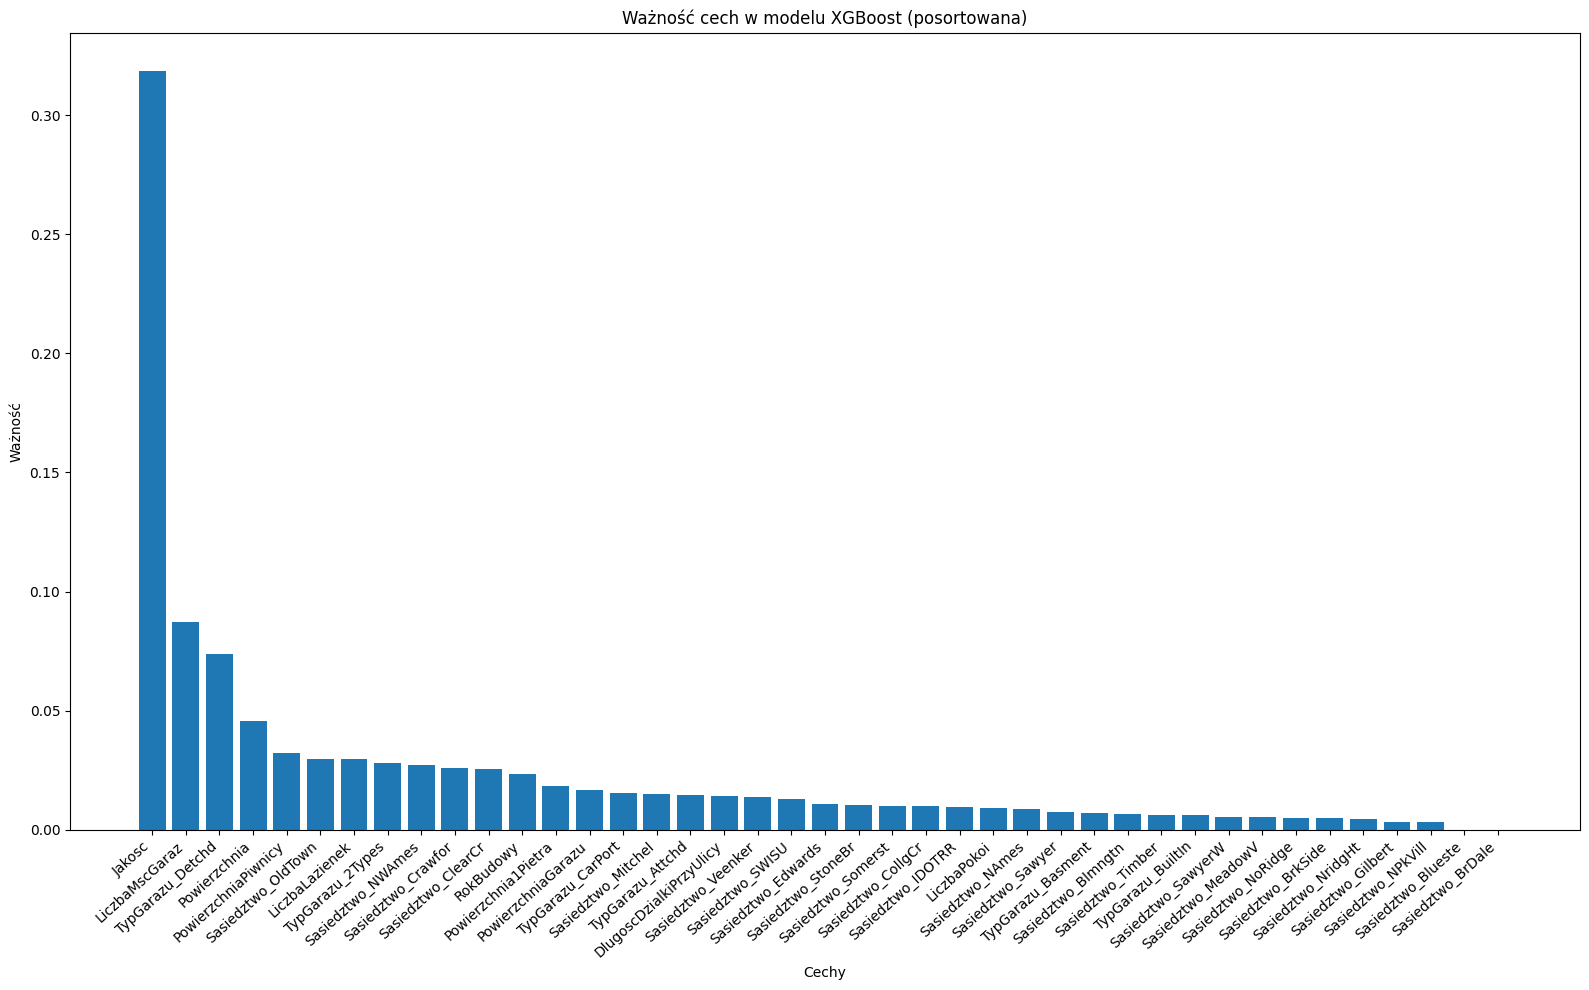

In [19]:
# 1. Zrób Series i posortuj malejąco
sorted_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

# 2. Wykres
plt.figure(figsize=(16,10))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_importances.index, rotation=42, ha="right")
plt.title('Ważność cech w modelu XGBoost (posortowana)')
plt.xlabel("Cechy")
plt.ylabel("Ważność")
plt.tight_layout()
plt.savefig('XGBoost_feature_importance.png')  # Zapisz wykres
plt.show()


## 📈 Interpretacja wykresów: Rzeczywiste vs. Przewidywane

Wykresy przedstawiają porównanie rzeczywistych wartości (`y_test`) z przewidywanymi (`y_pred`) dla różnych modeli regresji.

---

#### 🧭 Osie:

- **Oś X**: rzeczywiste ceny (wartości prawdziwe)
- **Oś Y**: przewidywane ceny przez model
- **Każda kropka** to jedna obserwacja (np. dom)

---

#### 📏 Linia przerywana: linia idealnych przewidywań (`y = x`)

- Punkt na linii = idealna predykcja
- Punkt **poniżej** linii → model **niedoszacował** wartości
- Punkt **powyżej** linii → model **przeszacował**

---

#### 📊 Jak czytać rozrzut punktów:

- Punkty **blisko linii** → mały błąd → **dobry model**
- Punkty **daleko od linii** → duży błąd → **słaby model**
- Jeśli punkty są **systematycznie nad lub pod linią** → możliwy **bias (stronniczość)** modelu

---

#### 🧠 Co sprawdzać na takich wykresach?

- **Rozrzut**: im mniejszy, tym lepiej
- **Symetria** względem linii: brak przesunięcia w jedną stronę
- **Outliery**: czy są pojedyncze, bardzo błędne predykcje?

---

#### ✅ Idealny model:

- Punkty tworzą chmurę **ściśle przy linii y = x**
- Nie ma wyraźnych odchyleń, ani ekstremalnych błędów

---

> 📌 W praktyce ten typ wykresu to jedna z najprostszych i najskuteczniejszych metod oceny jakości predykcji w regresji.


In [26]:
def plot_model_vs_predictions(ax, model_name, y_true, y_pred):
    ax.scatter(y_true, y_pred, color="purple", alpha=0.3)
    ax.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color="black",linestyle='--')
    ax.set_xlabel('Rzeczywiste ceny')
    ax.set_ylabel('Przewidywane ceny')
    ax.set_title(f'{model_name} – Rzeczywiste vs. Przewidywane')
    ax.grid(True)
    

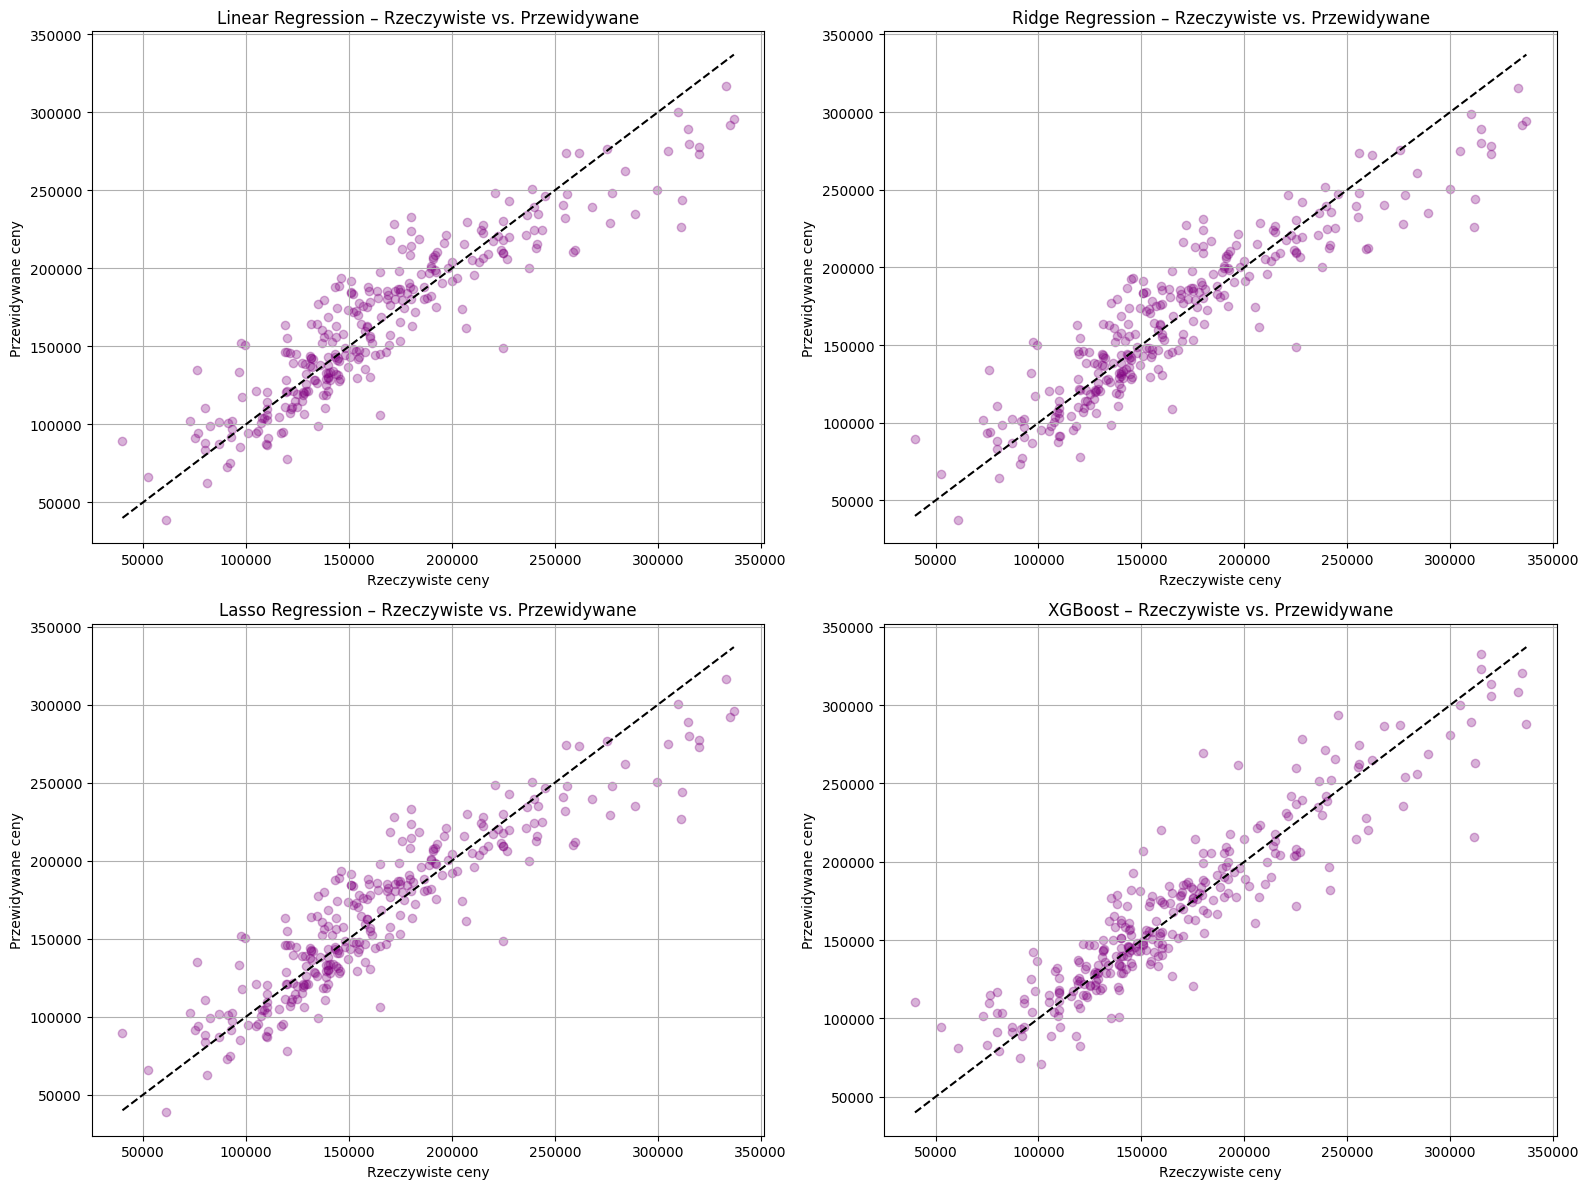

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

plot_model_vs_predictions(axes[0, 0], "Linear Regression", y_test, predictions["Linear Regression"])
plot_model_vs_predictions(axes[0, 1], "Ridge Regression", y_test, predictions["Ridge Regression"])
plot_model_vs_predictions(axes[1, 0], "Lasso Regression", y_test, predictions["Lasso Regression"])
plot_model_vs_predictions(axes[1, 1], "XGBoost", y_test, predictions["XGBoost"])
plt.tight_layout()
plt.savefig('model_predictions_comparison.png')  # Zapisz wykres
plt.show()